In [2]:
#In this case study, we're going to various applications of unsupervised learning methods
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

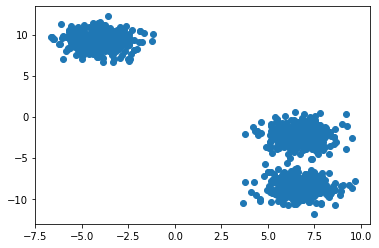

In [3]:
#Let's generate some data sets to try clustering on
#We'll start with three blobs
X_blobs = sklearn.datasets.make_blobs(n_samples=1000)[0]
plt.scatter(X_blobs[:,0],X_blobs[:,1])

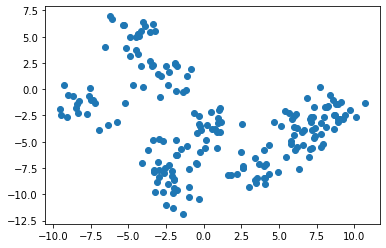

In [4]:
#Here are ten, sparse blobs
X_blobs_sparse = sklearn.datasets.make_blobs(n_samples=200,centers=10)[0]
plt.scatter(X_blobs_sparse[:,0],X_blobs_sparse[:,1])

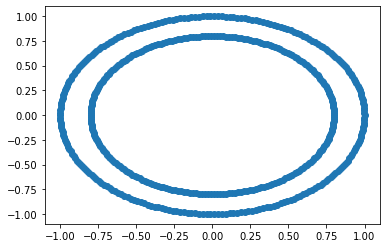

In [5]:
#Two concentric circles
X_circles = sklearn.datasets.make_circles(n_samples=500)[0]
plt.scatter(X_circles[:,0],X_circles[:,1])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass shuffle=200 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


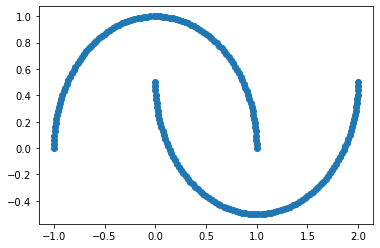

In [6]:
#Two moons
X_moons = sklearn.datasets.make_moons(200,200)[0]
plt.scatter(X_moons[:,0],X_moons[:,1])

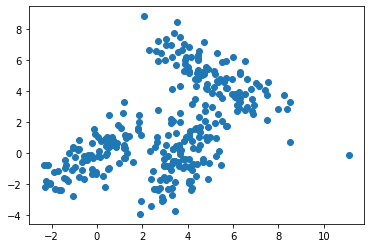

In [518]:
#Three non-isotropic Gaussians
X_gaussians = []
X_gaussians.extend(np.random.multivariate_normal([0,0], [[2,1.5],[1.5,2]], 100))
X_gaussians.extend(np.random.multivariate_normal([5,5], [[-2,1.5],[1.5,-2]], 100))
X_gaussians.extend(np.random.multivariate_normal([4,0], [[0.2,1.5],[1.5,3]], 100))
X_gaussians = np.asarray(X_gaussians)
plt.scatter(X_gaussians[:,0],X_gaussians[:,1])

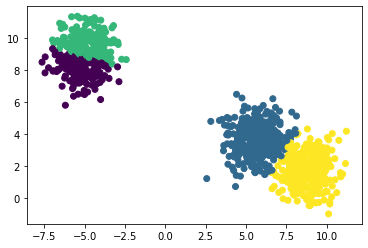

In [519]:
#Let's start with Kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4).fit(X_blobs)
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=kmeans.labels_)

Text(0, 0.5, 'Inertia')

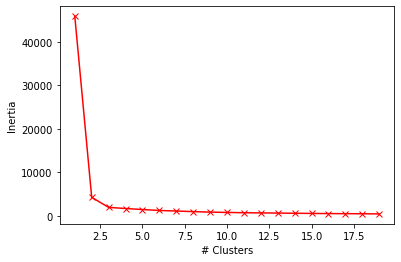

In [520]:
#How do we know how many clusters to use? Let's compute inertia for many options
inertias = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i).fit(X_blobs)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,20),inertias,'rx-')
plt.xlabel("# Clusters")
plt.ylabel("Inertia")


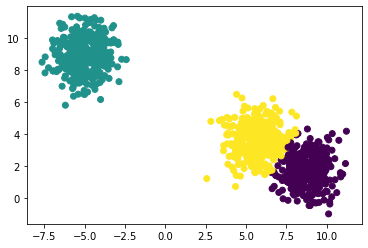

In [521]:
#Let's confirm that 3 clusters looks better
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3).fit(X_blobs)
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=kmeans.labels_)

Text(0, 0.5, 'Inertia')

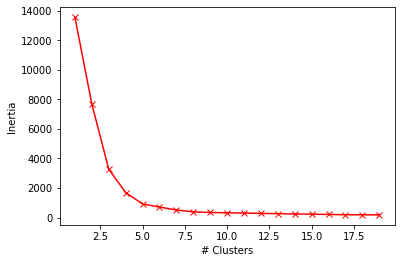

In [522]:
#Let's move on to the sparse blobs
inertias = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i).fit(X_blobs_sparse)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,20),inertias,'rx-')
plt.xlabel("# Clusters")
plt.ylabel("Inertia")

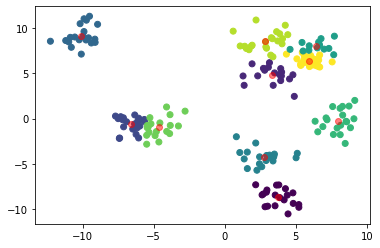

In [523]:
#Even with sparse blobs, this looks good!
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10).fit(X_blobs_sparse)
plt.scatter(X_blobs_sparse[:,0],X_blobs_sparse[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r',alpha=0.5)

Text(0, 0.5, 'Inertia')

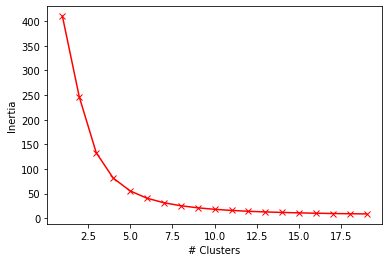

In [524]:
#Now we consider circles
inertias = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i).fit(X_circles)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,20),inertias,'rx-')
plt.xlabel("# Clusters")
plt.ylabel("Inertia")

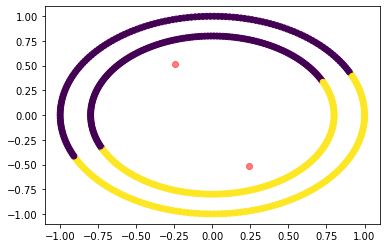

In [7]:
#This is really not what we want!
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2).fit(X_circles)
plt.scatter(X_circles[:,0],X_circles[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r',alpha=0.5)

In [526]:
#Challenge 1: Using the moons and Gaussian blobs data sets, use the inertia curve to find a good cluster value K, and visualize the clustering. 
#Are you happy with what you got?

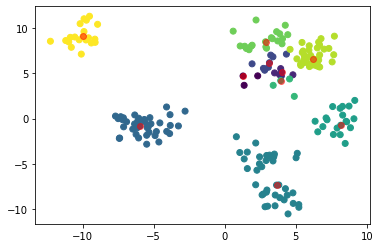

In [527]:
#Let's now try KMedoids
from sklearn_extra.cluster import KMedoids
kmed = KMedoids(n_clusters = 10).fit(X_blobs_sparse)
plt.scatter(X_blobs_sparse[:,0],X_blobs_sparse[:,1],c=kmed.labels_)
plt.scatter(kmed.cluster_centers_[:,0],kmed.cluster_centers_[:,1],c='r',alpha=0.5)


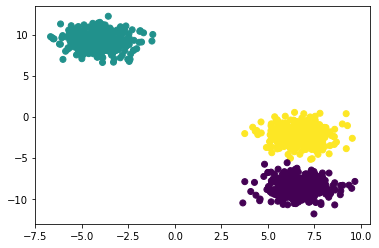

In [8]:
#We now import GMMs and see how they do on blobs...not bad
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=3,covariance_type='full')
gmm.fit(X_blobs)
color=gmm.predict(X_blobs)
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=color)

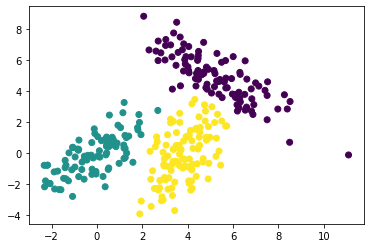

In [529]:
#They also do well on the Gaussians, as we had hoped!
gmm = mixture.GaussianMixture(n_components=3,covariance_type='full')
gmm.fit(X_gaussians)
color=gmm.predict(X_gaussians)
plt.scatter(X_gaussians[:,0],X_gaussians[:,1],c=color)

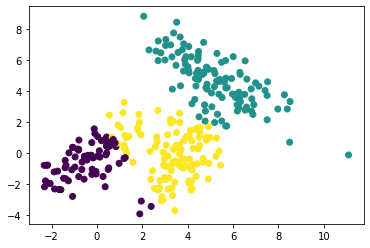

In [530]:
#Though they don't do so well if they are forced to share the same covariance matrix!
gmm = mixture.GaussianMixture(n_components=3,covariance_type='tied')
gmm.fit(X_gaussians)
color=gmm.predict(X_gaussians)
plt.scatter(X_gaussians[:,0],X_gaussians[:,1],c=color)

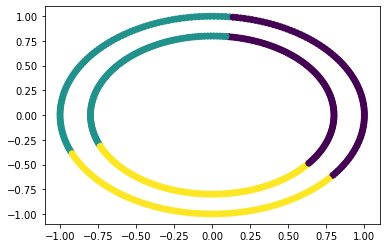

In [531]:
#It fails for the circles!
gmm = mixture.GaussianMixture(n_components=3,covariance_type='full')
gmm.fit(X_circles)
color=gmm.predict(X_circles)
plt.scatter(X_circles[:,0],X_circles[:,1],c=color)

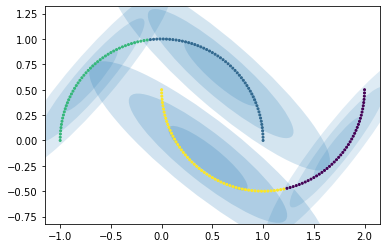

In [16]:
from matplotlib.patches import Ellipse

#给定的位置和协方差画一个椭圆
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    #将协方差转换为主轴
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    #画出椭圆
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
    
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=4, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=4, zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_  , gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
        


plot_gmm(gmm, X_moons)

In [ ]:
plt.scatter(X[:,0],X[:,1],c=color)

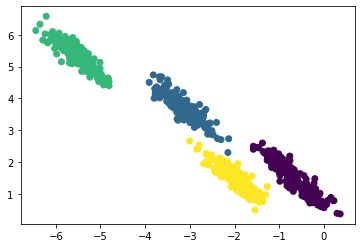

In [24]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=700, centers=4,
                       cluster_std=0.5, random_state=0)
X = X[:, ::-1] #方便画图
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

gmm = GMM(n_components=4, covariance_type='full', random_state=42)
gmm.fit(X_stretched)
color=gmm.predict(X_stretched)
plt.scatter(X_stretched[:,0],X_stretched[:,1],c=color)

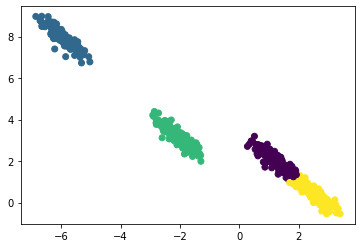

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4).fit(X_stretched)
plt.scatter(X_stretched[:,0],X_stretched[:,1],c=kmeans.labels_)
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r',alpha=0.5)

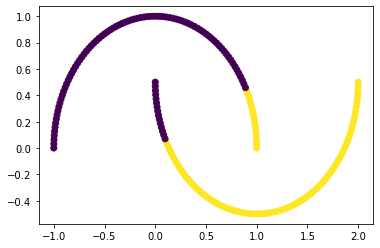

In [9]:
#nor does GMM do well for the moons.
gmm = mixture.GaussianMixture(n_components=2,covariance_type='full')
gmm.fit(X_moons)
color=gmm.predict(X_moons)
plt.scatter(X_moons[:,0],X_moons[:,1],c=color)

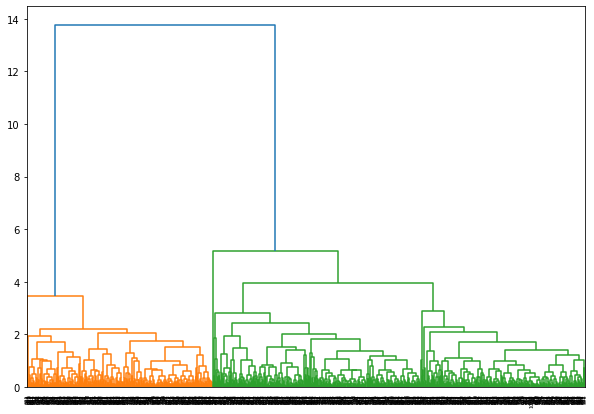

In [533]:
#Now let's look at hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X_blobs, 'average')

labelList = range(1, 1001)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

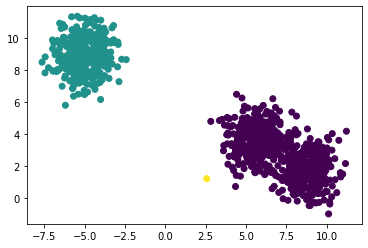

In [534]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster.fit_predict(X_blobs)
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=cluster.labels_)

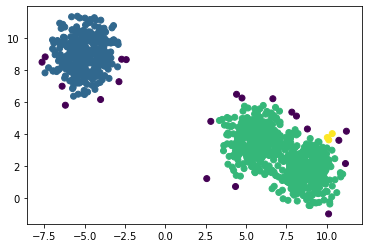

In [535]:
#We now turn to clustering by continuity...DBSCAN. We first apply it to the blobs. Ok, but it sees two clusters not three!
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.5, min_samples=3).fit(X_blobs)
color=clustering.labels_
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=color)

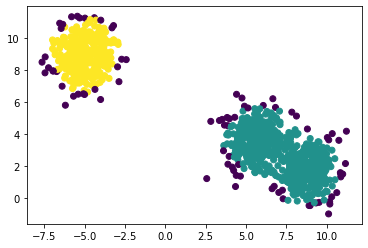

In [536]:
#We get three clusters if we change min_samples
clustering = DBSCAN(eps=0.5, min_samples=10).fit(X_blobs)
color=clustering.labels_
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=color)

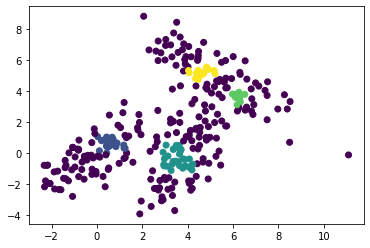

In [537]:
#The performance on the Gaussians isn't great
clustering = DBSCAN(eps=0.5, min_samples=10).fit(X_gaussians)
color=clustering.labels_
plt.scatter(X_gaussians[:,0],X_gaussians[:,1],c=color)

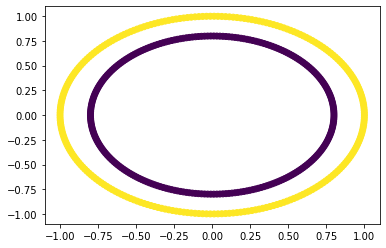

In [538]:
#But we get good performance for the circles.
clustering = DBSCAN(eps=0.1, min_samples=5).fit(X_circles)
color=clustering.labels_
plt.scatter(X_circles[:,0],X_circles[:,1],c=color)

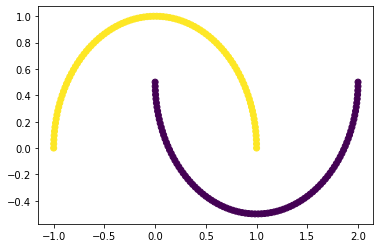

In [539]:
#And likewise for the moons.
clustering = DBSCAN(eps=0.5, min_samples=2).fit(X_moons)
color=clustering.labels_
plt.scatter(X_moons[:,0],X_moons[:,1],c=color)

In [540]:
#Challenge 2: Build a data set where DBScan and GMMs work well, but not KMeans.

In [541]:
#We now turn to some applications of clustering!

(478, 726, 4)


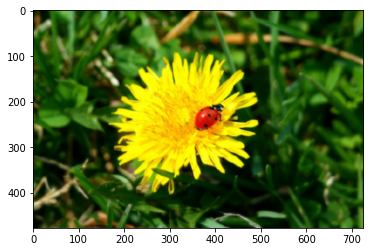

In [542]:
#Application 1: Clustering and Image Segmentation / Compression
from matplotlib.image import imread
image = imread("ladybug.png")
plt.imshow(image)
print(image.shape)

In [ ]:
X = 

In [2]:
X = image.reshape(-1,4)
kmeans = KMeans(n_clusters = 8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img)

NameError: name 'image' is not defined

In [1]:
segmented_img

NameError: name 'segmented_img' is not defined

In [544]:
#Challenge 3: This segmentation uses only the color data. What if we also want our segments to be spatially
#segmented? Can you find an easy way to do this?

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
<ipython-input-27-df4bf3103e7e>:5: RuntimeWarning: covariance is not positive-semidefinite.
  X_gaussians.extend(np.random.multivariate_normal([5,5], [[-2,1.5],[1.5,-2]], 100))


LogisticRegression(max_iter=10000, random_state=0)

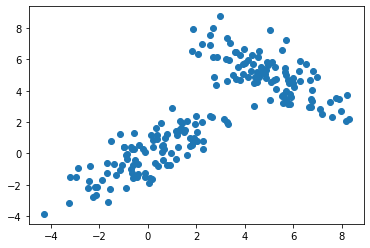

In [27]:
#Logistic Regression
from sklearn.linear_model.logistic import LogisticRegression
X_gaussians = []
X_gaussians.extend(np.random.multivariate_normal([0,0], [[2,1.5],[1.5,2]], 100))
X_gaussians.extend(np.random.multivariate_normal([5,5], [[-2,1.5],[1.5,-2]], 100))
X_gaussians = np.asarray(X_gaussians)
Y_gaussians = [0]*100 + [1]*100
plt.scatter(X_gaussians[:,0],X_gaussians[:,1])
log_reg = LogisticRegression(random_state=0,max_iter=10000)
log_reg.fit(X_gaussians,Y_gaussians)

(1000, 2)


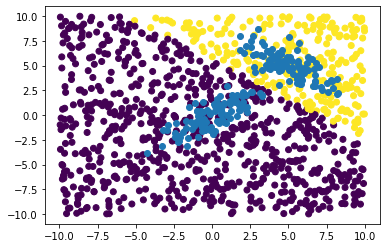

In [30]:
X_test = np.random.uniform(-10,10,(1000,2))
print(np.shape(X_test))
y_test = log_reg.predict(X_test)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.scatter(X_gaussians[:,0],X_gaussians[:,1])

In [31]:
y_test

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [547]:
#Application 2: Preprocessing
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits,y_digits)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0,max_iter=10000)
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.9644444444444444

In [548]:
from scipy.spatial.distance import cdist
from sklearn.base import BaseEstimator, TransformerMixin
class X_to_cluster_distances(BaseEstimator, TransformerMixin):
    def __init__(self,K):
        self.K = K
    def fit(self,X,y = None):
        km = KMeans(self.K)
        km.fit(X)
        self.centers = km.cluster_centers_
    def transform(self, X,y = None):
        return cdist(X,self.centers)
    def fit_transform(self, X,y = None):
        self.fit(X)
        D = self.transform(X)
        return D



In [549]:
from sklearn.pipeline import Pipeline
from warnings import simplefilter
# ignore all warnings
simplefilter(action='ignore')

pipeline = Pipeline([("kmeans_to_dist", X_to_cluster_distances(K=100)),
("log_reg",LogisticRegression(max_iter=1000))])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('kmeans_to_dist', X_to_cluster_distances(K=100)),
                ('log_reg', LogisticRegression(max_iter=1000))])

In [550]:
pipeline.score(X_test,y_test)

0.9777777777777777

In [551]:
#Let's find the best K using a grid search
from sklearn.model_selection import GridSearchCV
param_grid = [{'kmeans_to_dist__K':range(10,100,5)}]
grid_clf = GridSearchCV(pipeline,param_grid,cv=3,verbose=2)
grid_clf.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ...............................kmeans_to_dist__K=10; total time=   1.1s
[CV] END ...............................kmeans_to_dist__K=10; total time=   1.3s
[CV] END ...............................kmeans_to_dist__K=10; total time=   0.9s
[CV] END ...............................kmeans_to_dist__K=15; total time=   1.0s
[CV] END ...............................kmeans_to_dist__K=15; total time=   0.9s
[CV] END ...............................kmeans_to_dist__K=15; total time=   1.0s
[CV] END ...............................kmeans_to_dist__K=20; total time=   1.0s
[CV] END ...............................kmeans_to_dist__K=20; total time=   1.0s
[CV] END ...............................kmeans_to_dist__K=20; total time=   1.0s
[CV] END ...............................kmeans_to_dist__K=25; total time=   1.1s
[CV] END ...............................kmeans_to_dist__K=25; total time=   1.1s
[CV] END ...............................kmeans_t

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans_to_dist',
                                        X_to_cluster_distances(K=100)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=1000))]),
             param_grid=[{'kmeans_to_dist__K': range(10, 100, 5)}], verbose=2)

In [552]:
grid_clf.best_params_

{'kmeans_to_dist__K': 90}

In [553]:
grid_clf.score(X_test,y_test)

0.9755555555555555

In [554]:
#Application 3: Let's look at semi-supervised learning
#What happens if we train with only 50 data points?
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])
log_reg.score(X_test,y_test)

0.8177777777777778

In [555]:
#Let's take the 50 closest data points to the cluster centers
kmeans = KMeans(n_clusters = 50,random_state=0)
X_digits_dist = kmeans.fit_transform(X_train)
rep_digit_idx = np.argmin(X_digits_dist,axis=0)
X_rep_digits = X_train[rep_digit_idx]

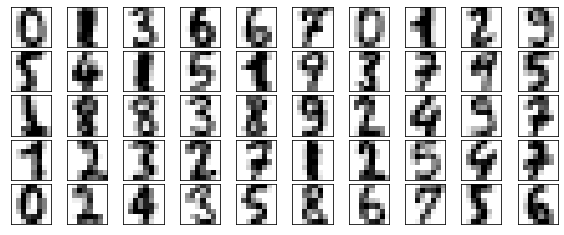

In [556]:
#Let's plot some of the figures...
def plot_digits(data):
    fig, axes = plt.subplots(5,10,figsize=(10,4),subplot_kw = {'xticks':[], 'yticks':[]},
                            gridspec_kw = dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8), cmap = 'binary', interpolation='nearest', clim=(0,16))
plot_digits(X_rep_digits)

In [557]:
#Using these data points improves accuracy
log_reg = LogisticRegression()
log_reg.fit(X_rep_digits,y_train[rep_digit_idx])
log_reg.score(X_test,y_test)


0.9133333333333333

In [558]:
#Now let's try "data propagation"
y_train_prop = np.empty(len(X_train),dtype = np.int32)
for i in range(50):
    y_train_prop[kmeans.labels_==i] = y_train[rep_digit_idx][i]

In [559]:
#Slight improvement...but maybe we are over-propogating?
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train_prop)
log_reg.score(X_test,y_test)


0.9266666666666666

In [560]:
#Let's only take the 10% closest points to each cluster

percentiles = []
for k in range(50):
    cluster = X_train[kmeans.labels_ == k]
    center = kmeans.cluster_centers_[k]
    distances = [np.linalg.norm(pt - center) for pt in cluster]
    percentiles.append(np.percentile(distances,10))

close_enough = []
for i, pt in enumerate(X_train):
    l = kmeans.labels_[i]
    if np.linalg.norm(pt - 
    kmeans.cluster_centers_[l]) <= percentiles[l]:
        close_enough.append(True)
    else:
        close_enough.append(False)
    
print(np.sum(close_enough))


156


In [561]:
#A little bit better!
log_reg = LogisticRegression()
log_reg.fit(X_train[close_enough],y_train_prop[close_enough])
log_reg.score(X_test,y_test)


0.9333333333333333